In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


%matplotlib inline

In [2]:
dfa = pd.read_csv('../data/ruths_data/OTUD6A_high_TRAIL.txt', sep='\t')
dfb = pd.read_csv('../data/ruths_data/OTUD6A_high_no_TRAIL.txt', sep='\t')
dfa = dfa.drop(columns=['Unnamed: 2'])
dfb = dfb.drop(columns=['Unnamed: 2'])
dfa['TRAIL'] = True
dfb['TRAIL'] = False
data = pd.concat([dfa, dfb])

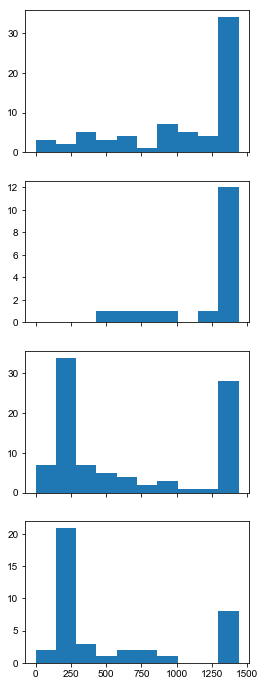

In [3]:
fig, axes = plt.subplots(4, 1, sharex=True)
fig.set_size_inches(4, 12)
lims = (0., 1440)
nbins = 10
axes[0].hist(data.loc[~data['TRAIL'] & 
                      (data['IntDen'] == 0),
                      'TimeOfDeath_trunc_24h'].values,
             bins=nbins,
             range=lims)
axes[1].hist(data.loc[~data['TRAIL'] & 
                      (data['IntDen'] > 0),
                      'TimeOfDeath_trunc_24h'].values,
            bins=nbins,
            range=lims)
axes[2].hist(data.loc[data['TRAIL'] & 
                      (data['IntDen'] == 0),
                      'TimeOfDeath_trunc_24h'].values,
             bins=nbins,
             range=lims)
axes[3].hist(data.loc[data['TRAIL'] & 
                      (data['IntDen'] > 0),
                      'TimeOfDeath_trunc_24h'].values,
             bins=nbins,
             range=lims);

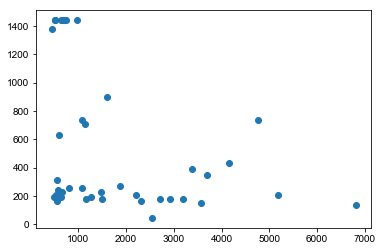

In [4]:
fig, ax = plt.subplots(1, 1)
x = data.loc[data['TRAIL'] & data['IntDen'] > 0, 'IntDen'].values.copy()
y = data.loc[data['TRAIL'] & data['IntDen'] > 0, 'TimeOfDeath_trunc_24h'].values.copy()
ax.scatter(x, y)
real_pcc = stats.pearsonr(x, y)[0]

In [5]:
rand_y = y.copy()
rand_pccs = []
for __ in range(100000):
    np.random.shuffle(rand_y)
    rand_pccs.append(stats.pearsonr(x, rand_y)[0])
rand_pccs = np.array(rand_pccs)

(array([5.0800e+02, 5.7710e+03, 1.7736e+04, 2.7312e+04, 2.4994e+04,
        1.5421e+04, 6.2990e+03, 1.6740e+03, 2.6700e+02, 1.8000e+01]),
 array([-0.47011472, -0.35339   , -0.23666529, -0.11994058, -0.00321587,
         0.11350884,  0.23023355,  0.34695826,  0.46368297,  0.58040769,
         0.6971324 ]),
 <a list of 10 Patch objects>)

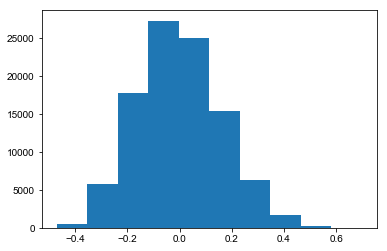

In [6]:
plt.hist(rand_pccs)

In [7]:
(((rand_pccs <= real_pcc).sum() / rand_pccs.shape[0]) * 2)

0.01126

In [8]:
rand_pccs.shape[0]

100000